### Detecting Malaria cells using Convolutional Neural Network

**Importing Modules**

In [1]:
import os 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import imread

import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing import image

from sklearn.metrics import classification_report, confusion_matrix

**Reading Data**

In [2]:
data_dir = 'cell_images'

In [3]:
print(os.listdir(data_dir))

['test', 'train']


In [4]:
test_path = data_dir + "/test/"
train_path = data_dir + "/train/"

In [5]:
test_path

'../input/malaria-cell-images-dataset/cell_images/test/'

In [6]:
train_path

'../input/malaria-cell-images-dataset/cell_images/train/'

In [7]:
print(os.listdir(test_path))

['uninfected', 'parasitized']


In [8]:
print(os.listdir(train_path))

['uninfected', 'parasitized']


In [9]:
# os.listdir(test_path + "/parasitized/")

In [10]:
len(os.listdir(test_path + "/parasitized/")) 

1300

In [11]:
# os.listdir(test_path + "/uninfected/")

In [12]:
len(os.listdir(test_path + "/uninfected/")) 

1300

In [13]:
# os.listdir(train_path + "/parasitized/")

In [14]:
len(os.listdir(train_path + "/parasitized/"))   

12480

In [15]:
# os.listdir(train_path + "/uninfected/")

In [16]:
len(os.listdir(train_path + "/uninfected/"))  

12480

In [17]:
os.listdir(train_path + "/parasitized/")[0]

'C99P60ThinF_IMG_20150918_141001_cell_93.png'

In [18]:
os.listdir(test_path + "/parasitized/")[0]

'C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

In [19]:
para_cell = test_path + "parasitized/" + "C68P29N_ThinF_IMG_20150819_134712_cell_55.png"

In [20]:
para_cell

'../input/malaria-cell-images-dataset/cell_images/test/parasitized/C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

In [21]:
# imread(para_cell)

In [22]:
imread(para_cell).max()

0.8862745

In [23]:
imread(para_cell).min()

0.0

In [24]:
imread(para_cell).shape

(136, 151, 3)

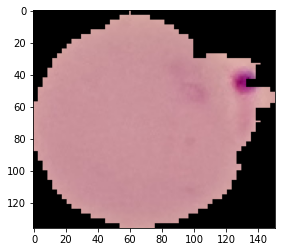

In [25]:
plt.imshow(imread(para_cell))

In [26]:
os.listdir(test_path + "/uninfected/")[0]

'C181P142ThinF_IMG_20151127_155722_cell_78.png'

In [27]:
uninfected_cell = test_path + "uninfected/" + "C181P142ThinF_IMG_20151127_155722_cell_78.png"

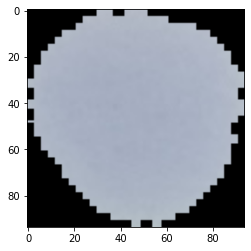

In [28]:
plt.imshow(imread(uninfected_cell))

In [29]:
dim1 = []
dim2 = []

for img_filename in os.listdir(test_path + "uninfected"):
    img = imread(test_path + "uninfected/" + img_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [30]:
# dim1

In [31]:
# dim2

In [32]:
np.mean(dim1)

130.92538461538462

In [33]:
np.mean(dim2)

130.75

In [34]:
image_shape = (130, 130, 3)   # 130 * 130 * 3

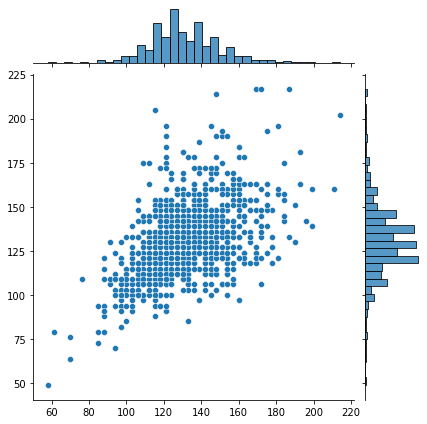

In [35]:
sns.jointplot(x=dim1, y=dim2)

**Data Processing**

In [36]:
# help(ImageDataGenerator)

In [37]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

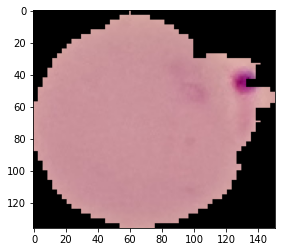

In [38]:
para_img = imread(para_cell)
plt.imshow(para_img)

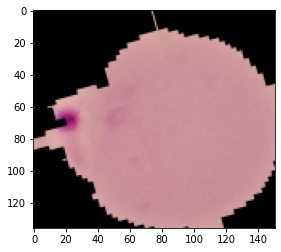

In [39]:
plt.imshow(image_gen.random_transform(para_img))

In [40]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [41]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


**Create the Mode**

In [42]:
image_shape = (130, 130, 3)

In [43]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [45]:
batch_size = 16

In [46]:
image_shape[:2]

(130, 130)

In [47]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [48]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [49]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [50]:
# from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [52]:
results = model.fit(train_image_gen, epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 192s 121ms/step - loss: 2.7425 - accuracy: 0.5424 - val_loss: 0.6856 - val_accuracy: 0.5492
Epoch 2/20
1560/1560 [==============================] - 136s 87ms/step - loss: 0.6840 - accuracy: 0.5668 - val_loss: 0.6728 - val_accuracy: 0.5842
Epoch 3/20
1560/1560 [==============================] - 145s 93ms/step - loss: 0.6744 - accuracy: 0.5841 - val_loss: 0.6704 - val_accuracy: 0.6062
Epoch 4/20
1560/1560 [==============================] - 138s 89ms/step - loss: 0.6490 - accuracy: 0.6202 - val_loss: 0.2264 - val_accuracy: 0.9327
Epoch 5/20
1560/1560 [==============================] - 140s 90ms/step - loss: 0.2140 - accuracy: 0.9335 - val_loss: 0.1881 - val_accuracy: 0.9381
Epoch 6/20
1560/1560 [==============================] - 140s 90ms/step - loss: 0.1799 - accuracy: 0.9422 - val_loss: 0.1808 - val_accuracy: 0.9396
Epoch 7/20
1560/1560 [==============================] - 142s 91ms/step - loss: 0.1653 - accuracy: 0.9483 - val_loss: 

In [53]:
model.save('malaria_detector.h5')

In [54]:
model.history.history

{'loss': [0.9925336241722107,
  0.6803160309791565,
  0.6750975251197815,
  0.5580654144287109,
  0.20363874733448029,
  0.18206627666950226,
  0.17394286394119263,
  0.17546728253364563,
  0.17222175002098083,
  0.17039944231510162],
 'accuracy': [0.553129255771637,
  0.5760477781295776,
  0.5882682800292969,
  0.6926436424255371,
  0.9370943307876587,
  0.9424633383750916,
  0.9464300274848938,
  0.9455084800720215,
  0.9462697505950928,
  0.9484734535217285],
 'val_loss': [0.6855610013008118,
  0.6727866530418396,
  0.670435905456543,
  0.22640317678451538,
  0.1881060004234314,
  0.18084155023097992,
  0.17991416156291962,
  0.16714511811733246,
  0.16858351230621338,
  0.1705000400543213],
 'val_accuracy': [0.5492307543754578,
  0.5842307806015015,
  0.6061538457870483,
  0.932692289352417,
  0.938076913356781,
  0.9396153688430786,
  0.9411538243293762,
  0.9484615325927734,
  0.9453846216201782,
  0.9461538195610046]}

**Evaluating the Model**

<AxesSubplot:>

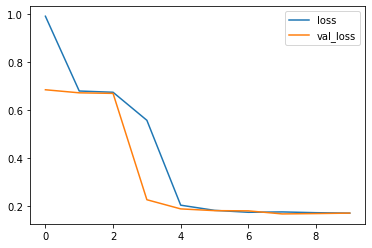

In [55]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [56]:
model.evaluate(test_image_gen)

163/163 [==============================] - 12s 75ms/step - loss: 0.1696 - accuracy: 0.9454


[0.16962933540344238, 0.9453846216201782]

In [57]:
model.metrics_names

['loss', 'accuracy']

In [58]:
pred = model.predict(test_image_gen)

In [59]:
pred

array([[1.5709060e-04],
       [6.7946785e-05],
       [5.9292978e-04],
       ...,
       [9.7811252e-01],
       [9.7834957e-01],
       [9.6896052e-01]], dtype=float32)

In [60]:
predictions = pred > 0.5

In [61]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [62]:
len(pred)

2600

In [63]:
# from sklearn.metrics import classification_report, confusion_matrix

In [64]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [65]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1300
           1       0.93      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [66]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1209   91]
 [  55 1245]]


In [67]:
# How to predict on a single image 

In [68]:
para_cell

'../input/malaria-cell-images-dataset/cell_images/test/parasitized/C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

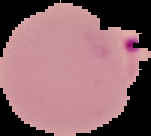

In [69]:
image.load_img(para_cell)

In [70]:
type(image.load_img(para_cell))

PIL.PngImagePlugin.PngImageFile

In [71]:
my_image = image.load_img(para_cell, target_size=image_shape)

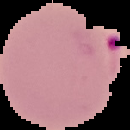

In [72]:
my_image

In [73]:
my_image_arr = image.img_to_array(my_image)

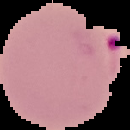

In [74]:
my_image

In [75]:
# my_image_arr

In [76]:
my_image_arr.shape   # one image (1, 130, 130, 3)

(130, 130, 3)

In [77]:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [78]:
my_image_arr.shape

(1, 130, 130, 3)

In [79]:
model.predict(my_image_arr)   # parasitized

array([[0.00964419]], dtype=float32)

In [80]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}